In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')

## tells us 6 categorical variables and 6 numerical
df.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [7]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


### 1. Categorical variables

In [14]:
print(df.country.value_counts())## 101 countries
print(df.age.value_counts()) ## 6 categories
print(df.generation.value_counts()) ## 6 categories

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64


### 2. Correlation between HDI and suicides_no

**HDI for year and suicides_no:** The correlation coefficient is 0.151399. This indicates a relatively weak positive correlation between HDI and the number of suicides. This means that as HDI increases, the number of suicides tends to increase slightly, but the relationship is not very strong.

In [16]:
df.corr()

C:\Users\tejas\AppData\Local\Temp\ipykernel_10216\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


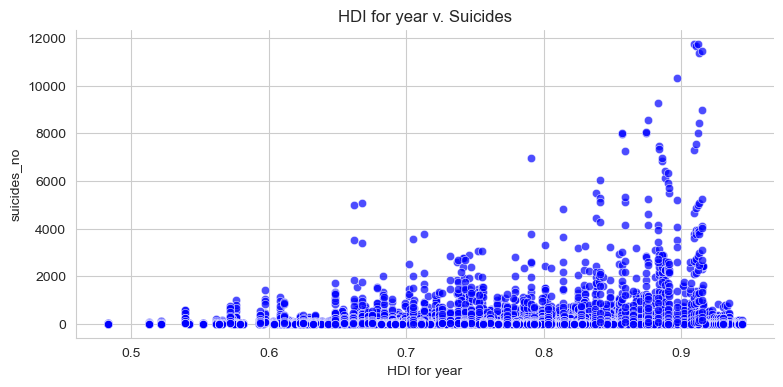

In [22]:
## Plot
sns.set_style("whitegrid")

x_data = df['HDI for year']
y_data = df['suicides_no']

plt.figure(figsize=(9, 4))
sns.scatterplot(x=x_data, y=y_data, color='blue', marker='o', alpha=0.7)

plt.xlabel('HDI for year')
plt.ylabel('suicides_no')
plt.title('HDI for year v. Suicides')

sns.despine()  # Remove the top and right spines
plt.grid(True)  # Add grid lines

plt.show()



From this graph we can clearly see that **HDI is weakly related to suicides_no, as most of the time increase in HDI is not corresponding with increase in suicides_no**

### 3. Which generation has the highest number of suicides/100k population

In [40]:
df.groupby('generation')['suicides/100k pop'].sum()

generation
Boomers             73563.05
G.I. Generation     65708.86
Generation X        67648.45
Generation Z          944.18
Millenials          31461.74
Silent             117217.55
Name: suicides/100k pop, dtype: float64

<Axes: xlabel='generation', ylabel='suicides/100k pop'>

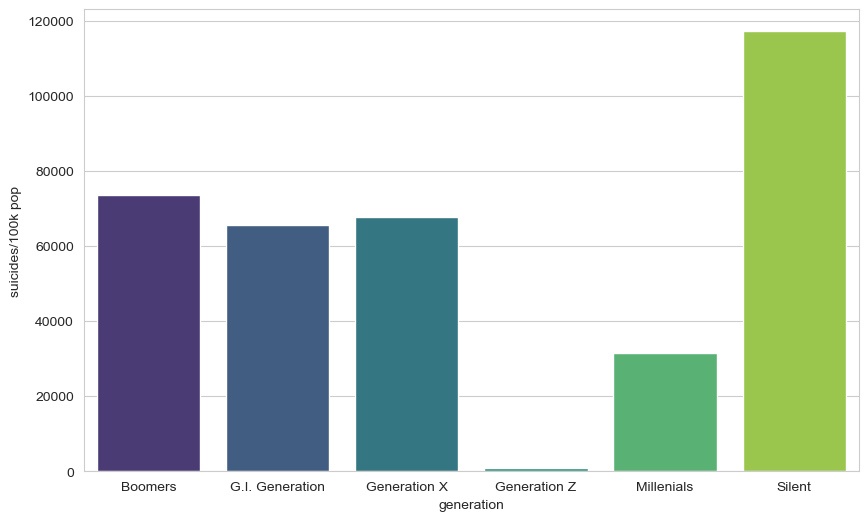

In [41]:
generation_suicides = df.groupby('generation')['suicides/100k pop'].sum().reset_index()

# Set Seaborn style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='generation', y='suicides/100k pop', data=generation_suicides, palette="viridis")